## 线性回归（梯度下降法）

In [9]:
### 0.引入依赖
import numpy as np
import matplotlib.pyplot as plt

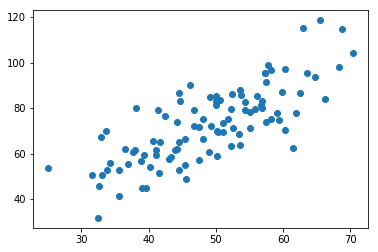

In [10]:
### 1.导入数据（data.csv） 
points = np.genfromtxt( "data.csv", delimiter="," )
# points

# 提取points里面的两列数据为X，Y
x = points[:, 0]
y = points[:, 1]

# 调用plt画出散点图
plt.scatter( x, y )
plt.show()

In [11]:
### 2.定义损失函数（损失函数是系数的函数，传入数据）
def compute_cost( w, b, points ):
    total_cost = 0
    M = len( points )
    
    # 逐点计算平方损失误差，然后求平均值
    for i in range( M ):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += ( y - w * x -b ) ** 2
    
    return total_cost / M

In [16]:
### 3.定义模型的超参数
alpha = 0.0001
initial_w = 0
initial_b = 0 
num_iter = 10

In [17]:
### 4.定义核心梯度下降算法函数
def grad_desc(points, initial_w, initial_b, alpha, num_iter):
    w = initial_w
    b = initial_b
    # 定义一个list保存所有的损失函数值，用来显示下降的过程
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append( compute_cost(w, b, points) )
        w, b = step_grad_desc( w, b, alpha, points )
    
    return [w, b, cost_list]

def step_grad_desc( current_w, current_b, alpha, points ):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    
    # 对每个点，代入公式求和
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_grad_w += ( current_w * x + current_b - y ) * x
        sum_grad_b += current_w * x + current_b - y
    
    # 用公式求当前梯度
    grad_w = 2/M * sum_grad_w
    grad_b = 2/M * sum_grad_b
    
    # 梯度下降，更新当前的w和b
    updated_w = current_w - alpha * grad_w
    updated_b = current_b - alpha * grad_b
    
    return updated_w, updated_b

w is:  1.4774173755483797
b is:  0.02963934787473238
cost is:  112.65585181499748


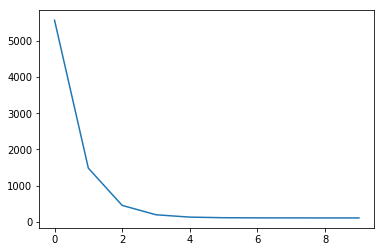

In [18]:
### 5.测试，运行梯度下降算法，计算最优的w和b
w, b, cost_list = grad_desc( points, initial_w, initial_b, alpha, num_iter )

print("w is: ", w)
print("b is: ", b)

cost = compute_cost(w, b, points)

print("cost is: ", cost)

plt.plot(cost_list)
plt.show()

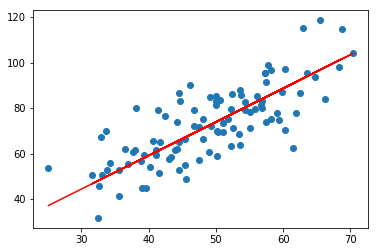

In [19]:
### 绘制拟合曲线
plt.scatter(x, y)
# 针对每一个x，计算出预测的y值
pred_y = w * x + b

plt.plot(x, pred_y, c='r')
plt.show()